In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import ast
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Survey.csv", sep=",", names=["Timestamp","Game option","Start time","End time","Game time","Numbers of game","Manual Close","Eye Tracking","survey","Q1","Q2","Q3","Q4", "Q5","Q6","Q7","Q8","Q9","Q10","Q11","Q12","Q13","Q14","Q15","Q16","Q17","Q18","Q19","Q20","Q21","Q22","Q23","Q24", "Q25","Q26","Q27","Q28","Q29","Q30","Q31","Q32"], skiprows=1)

In [3]:
def getAttention(arr):
    count = 0
    perception = 0.35
    for i in arr:
        if i <= perception:
            count += 1
    return count/len(arr)

In [4]:
def getLongPerception(arr, group):
    index = [0,5,10,15]
    perception = 0
    if group == 'Game 1':
        index = [0,5,10,15]
    elif group == 'Game 2':
        index = [4,9,14,19]
    for i in index:
        perception += getAttention(arr[i])
    return perception/4

In [5]:
def getShortPerception(arr, group):
    index = [1,2,3,4,6,7,8,9,11,12,13,14,16,17,18,19]
    perception = 0
    if group == 'Game 1':
        index = [1,2,3,4,6,7,8,9,11,12,13,14,16,17,18,19]
    elif group == 'Game 2':
        index = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18]
    for i in index:
        perception += getAttention(arr[i])
    return perception/16

In [6]:
def getLong(arr, group):
    index = [0,5,10,15]
    new_arr = []
    if group == 'Game 1':
        index = [0,5,10,15]
    elif group == 'Game 2':
        index = [4,9,14,19]
    for i in index:
        new_arr.append(arr[i])
    return new_arr

In [7]:
def getShort(arr, group):
    index = [1,2,3,4,6,7,8,9,11,12,13,14,16,17,18,19]
    new_arr = []
    if group == 'Game 1':
        index = [1,2,3,4,6,7,8,9,11,12,13,14,16,17,18,19]
    elif group == 'Game 2':
        index = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18]
    for i in index:
        new_arr.append(arr[i])
    return new_arr

In [8]:
def getCorrectRate(df, answer):
    size = len(answer)
    result = []
    for i in range(len(df)):
        row = df.loc[i].values
        tmp = []
        for j in range(size):
            if str(answer[j]).find(";") == -1:
                if str(answer[j]) == str(row[j]):
                    tmp.append(1)
                else:
                    tmp.append(0)
            else:
                tmp1 = np.array(answer[j].split(";"))
                if str(row[j]).find(";") != -1:
                    tmp2 = np.array(row[j].split(";"))
                else:
                    tmp2 = np.array([row[j]])
                tmp.append(len(set(tmp1) & set(tmp2))/np.size(tmp1))
        result.append(tmp)
    return result

In [9]:
longAvgT1 = []
shortAvgT1 = []
longAvgT2 = []
shortAvgT2 = []
group1_long = []
group1_short = []
group2_long = []
group2_short = []
for i in range(len(df)):
    tracking = ast.literal_eval(df['Eye Tracking'][i])
    group_id = df['Game option'][i]
    if group_id == 'Game 1':
        group1_long.append(getLong(tracking,group_id))
        group1_short.append(getShort(tracking,group_id))
        longAvgT1.append(getLongPerception(tracking,group_id))
        shortAvgT1.append(getShortPerception(tracking,group_id))
    elif group_id == 'Game 2':
        group2_long.append(getLong(tracking,group_id))
        group2_short.append(getShort(tracking,group_id))
        longAvgT2.append(getLongPerception(tracking,group_id))
        shortAvgT2.append(getShortPerception(tracking,group_id))

In [10]:
right_answer_l = ["Hearing loss","Maxico","No","Yes","2018","Web design;Animation","2019","Artistic","Cultural Leader","Yes","Friendly","Yes","Actress;Author;Television personality","Yes","1981","2014"]
right_answer_s = ["Wheelchair","Wilson Centre","NCEA 2","Yes","Oct.;30th;California","Voices That Care","You Lucky Dog","Yes","2004","Yes","20 million","The jury didn't give the results","1994","Owen","Yes","2008"]
long_q = ["Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","Q10","Q11","Q12","Q17","Q18","Q19","Q20"]
short_q = ["Q13","Q14","Q15","Q16","Q21","Q22","Q23","Q24","Q25","Q26","Q27","Q28","Q29","Q30","Q31","Q32"]

In [11]:
df_l1 = df[long_q][df['Game option']=='Game 1'].reset_index(drop=True)
df_s1 = df[short_q][df['Game option']=='Game 1'].reset_index(drop=True)
df_l2 = df[long_q][df['Game option']=='Game 2'].reset_index(drop=True)
df_s2 = df[short_q][df['Game option']=='Game 2'].reset_index(drop=True)

In [12]:
CR_l1 = getCorrectRate(df_l1,right_answer_l)
CR_s1 = getCorrectRate(df_s1,right_answer_s)
CR_l2 = getCorrectRate(df_l2,right_answer_l)
CR_s2 = getCorrectRate(df_s2,right_answer_s)

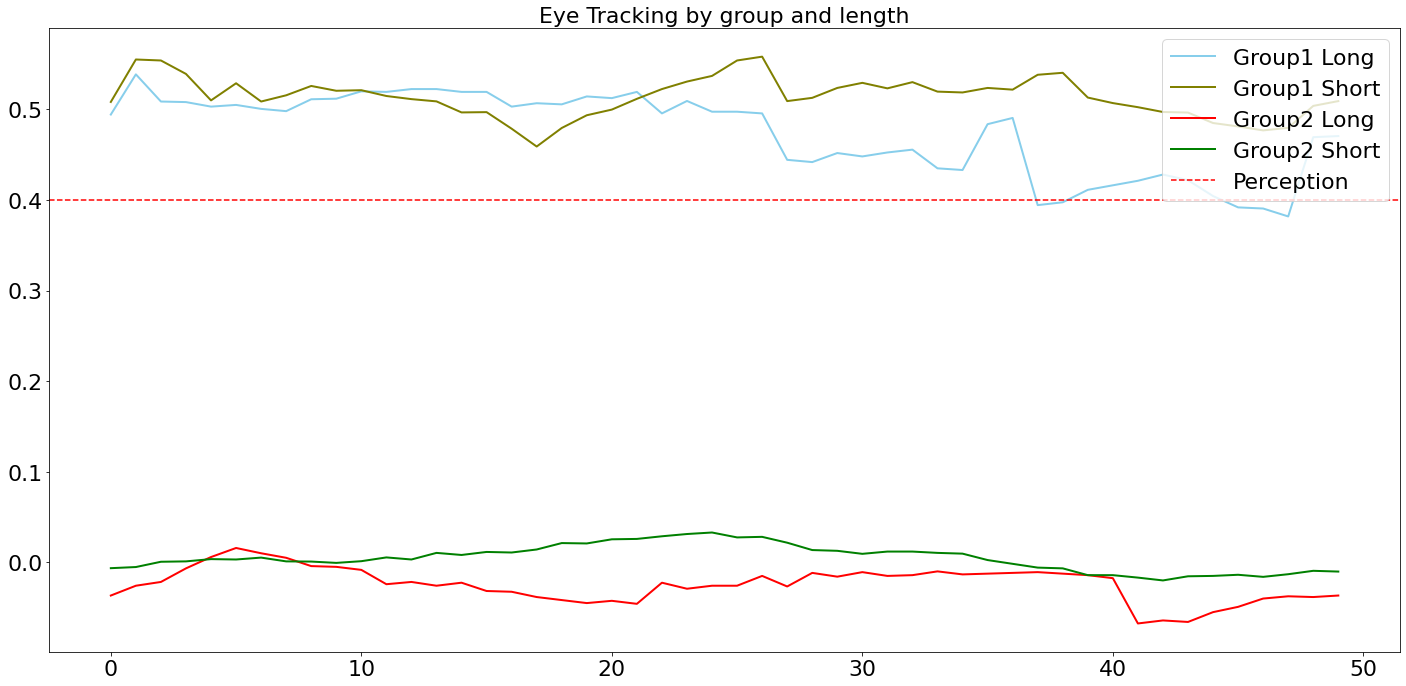

In [13]:
tracking_long1 = np.array(group1_long)
tracking_short1 = np.array(group1_short)
tracking_long2 = np.array(group2_long)
tracking_short2 = np.array(group2_short)
df1=pd.DataFrame({'x': range(0,50), 'Group1 Long': tracking_long1.mean(axis=(0,1)), 'Group1 Short': tracking_short1.mean(axis=(0,1)), 'Group2 Long': tracking_long2.mean(axis=(0,1)), 'Group2 Short': tracking_short2.mean(axis=(0,1)) })

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"]= 22
plt.rcParams["legend.loc"] = 'upper right' 
fig, ax = plt.subplots()
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=22)  
plt.title("Eye Tracking by group and length") 
plt.plot( 'x', 'Group1 Long', data=df1, marker='', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'x', 'Group1 Short', data=df1, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'Group2 Long', data=df1, marker='', color='red', linewidth=2)
plt.plot( 'x', 'Group2 Short', data=df1, marker='', color='green', linewidth=2)
plt.axhline(y=0.4, color='r', linestyle='--', label='Perception')
plt.legend(['Group1 Long', 'Group1 Short', 'Group2 Long', 'Group2 Short','Perception'])
fig.tight_layout()
plt.show()

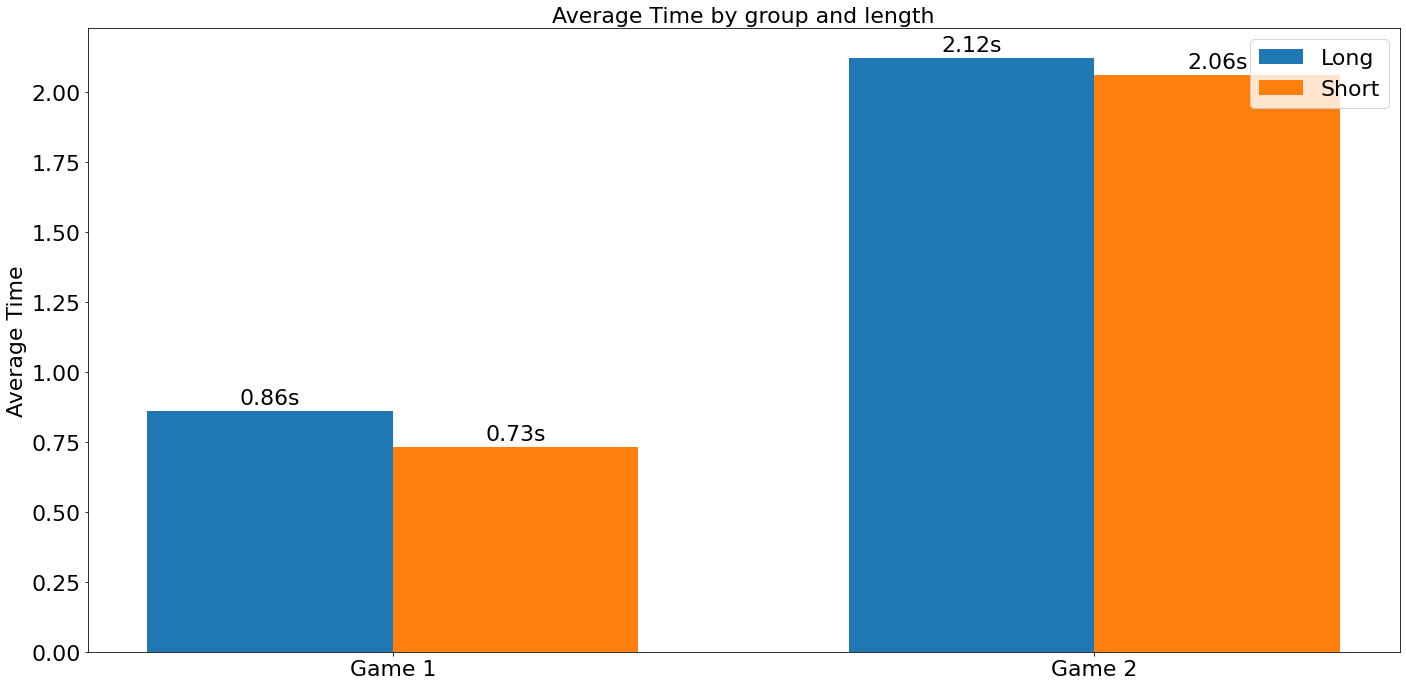

In [14]:
longAT1 = np.array(longAvgT1)
shortAT1 = np.array(shortAvgT1)
longAT2 = np.array(longAvgT2)
shortAT2 = np.array(shortAvgT2)

group_labels = ['Game 1','Game 2']
x = np.arange(len(group_labels))
width = 0.35

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
plt.rcParams["font.size"]= 22
plt.rcParams["legend.loc"] = 'upper right' 
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=22) 
rects1 = ax.bar(x - width/2, np.around([longAT1.mean()*5, longAT2.mean()*5],2), width, label='Long')
rects2 = ax.bar(x + width/2, np.around([shortAT1.mean()*5, shortAT2.mean()*5],2), width, label='Short')

ax.set_ylabel('Average Time')
ax.set_title('Average Time by group and length')
ax.set_xticks(x)
ax.set_xticklabels(group_labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}s'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

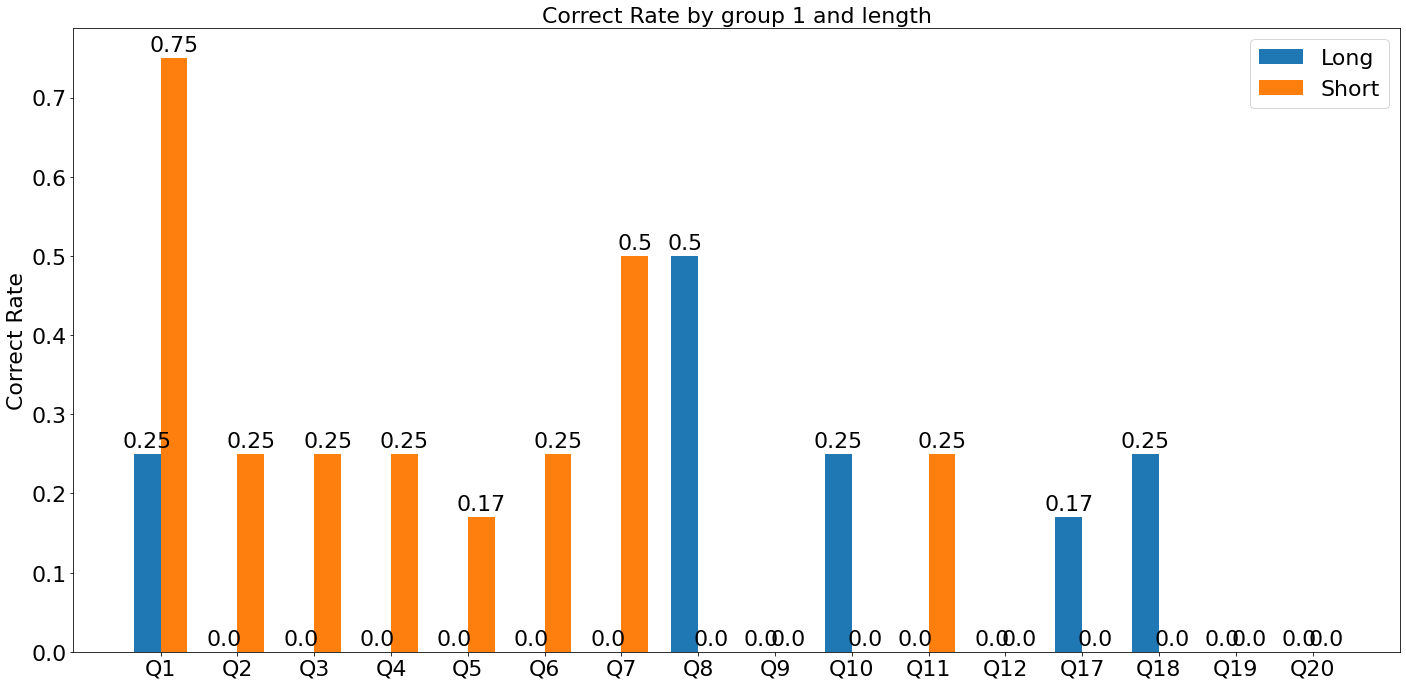

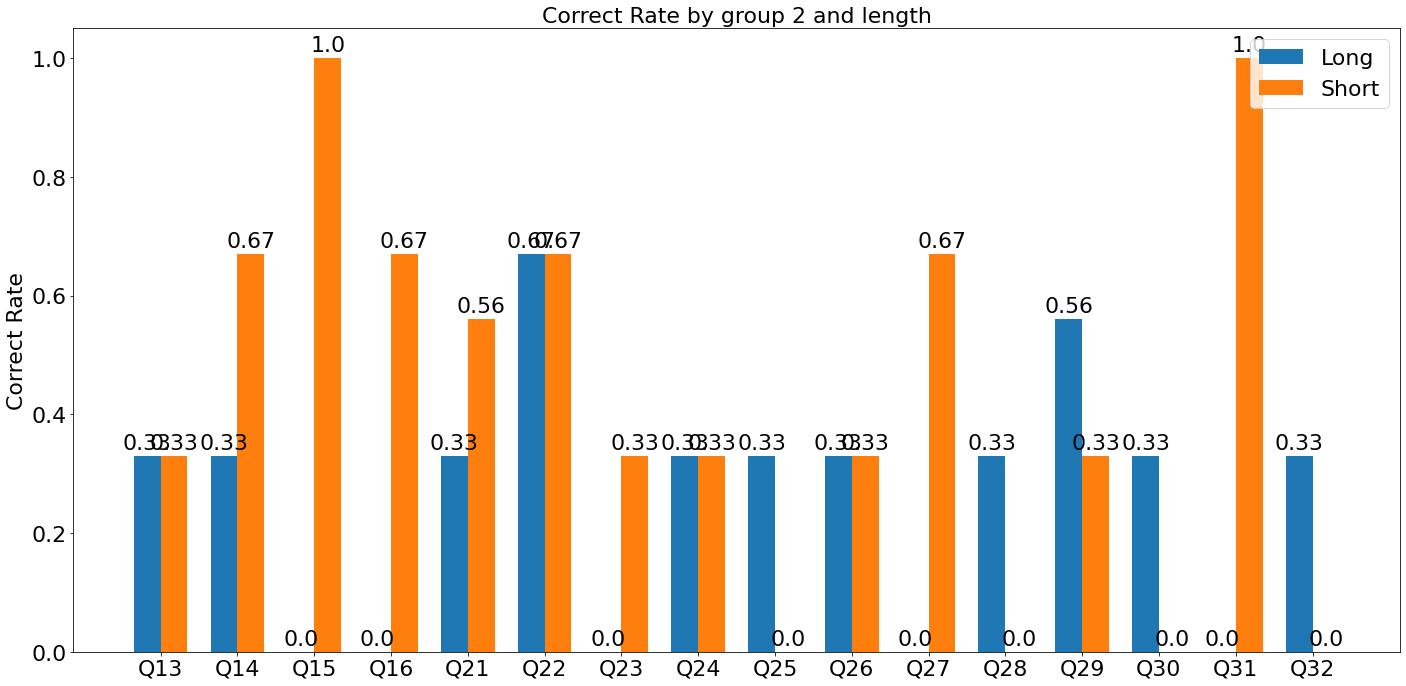

In [15]:
a_CR_l1 = np.array(CR_l1)
a_CR_s1 = np.array(CR_s1)
a_CR_l2 = np.array(CR_l2)
a_CR_s2 = np.array(CR_s2)

x = np.arange(len(long_q))

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
plt.rcParams["font.size"]= 22
plt.rcParams["legend.loc"] = 'upper right' 
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=22) 
rects1 = ax.bar(x - width/2, np.around(a_CR_l1.mean(axis=0),2), width, label='Long')
rects2 = ax.bar(x + width/2, np.around(a_CR_s1.mean(axis=0),2), width, label='Short')

ax.set_ylabel('Correct Rate')
ax.set_title('Correct Rate by group 1 and length')
ax.set_xticks(x)
ax.set_xticklabels(long_q)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


x = np.arange(len(short_q))
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
plt.rcParams["font.size"]= 22
plt.rcParams["legend.loc"] = 'upper right' 
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=22) 
rects1 = ax.bar(x - width/2, np.around(a_CR_l2.mean(axis=0),2), width, label='Long')
rects2 = ax.bar(x + width/2, np.around(a_CR_s2.mean(axis=0),2), width, label='Short')

ax.set_ylabel('Correct Rate')
ax.set_title('Correct Rate by group 2 and length')
ax.set_xticks(x)
ax.set_xticklabels(short_q)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

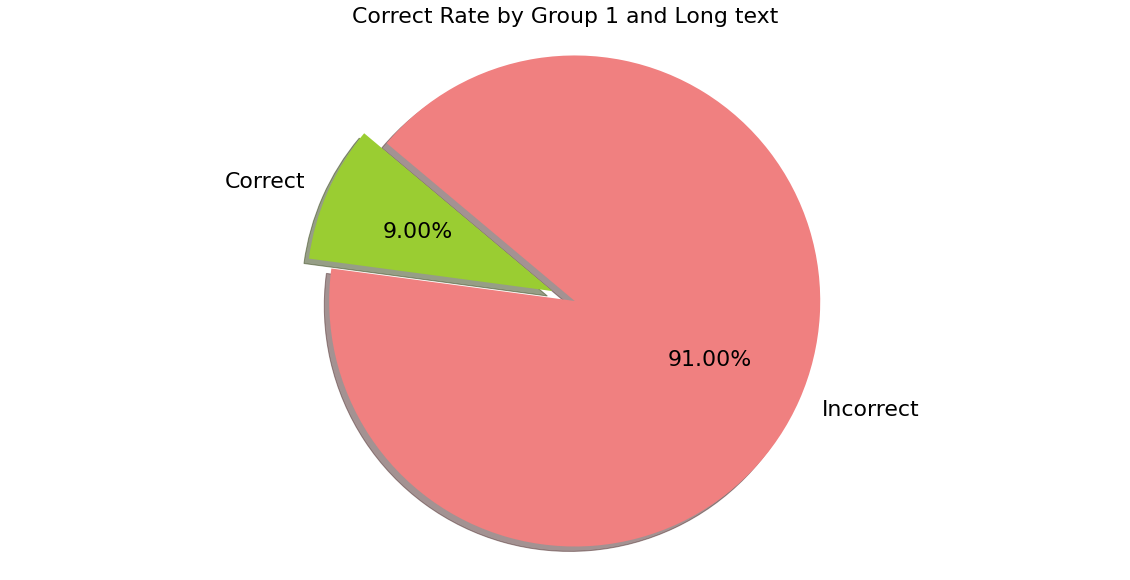

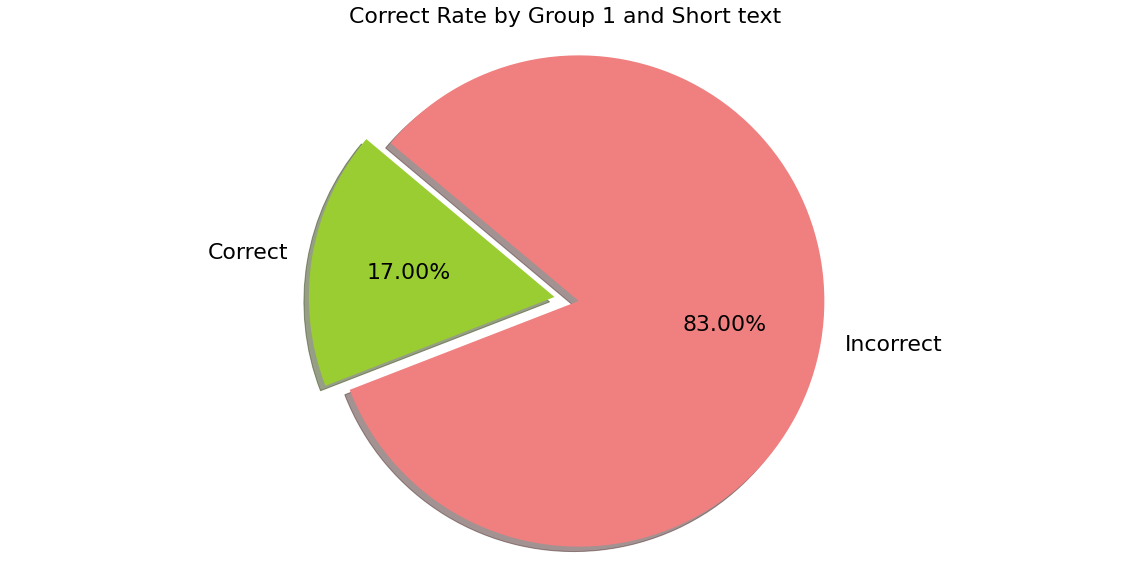

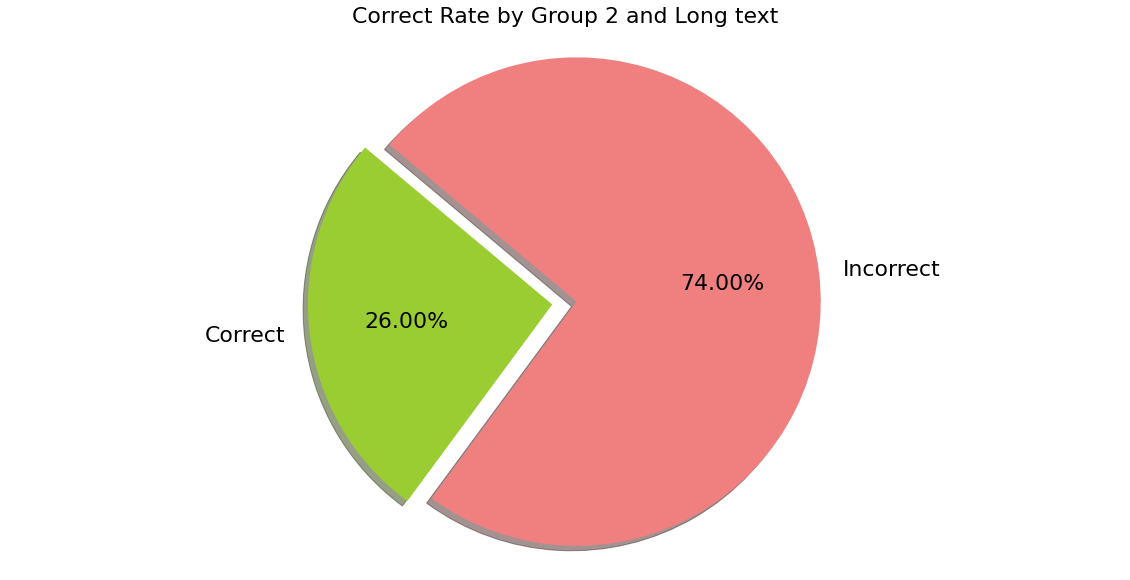

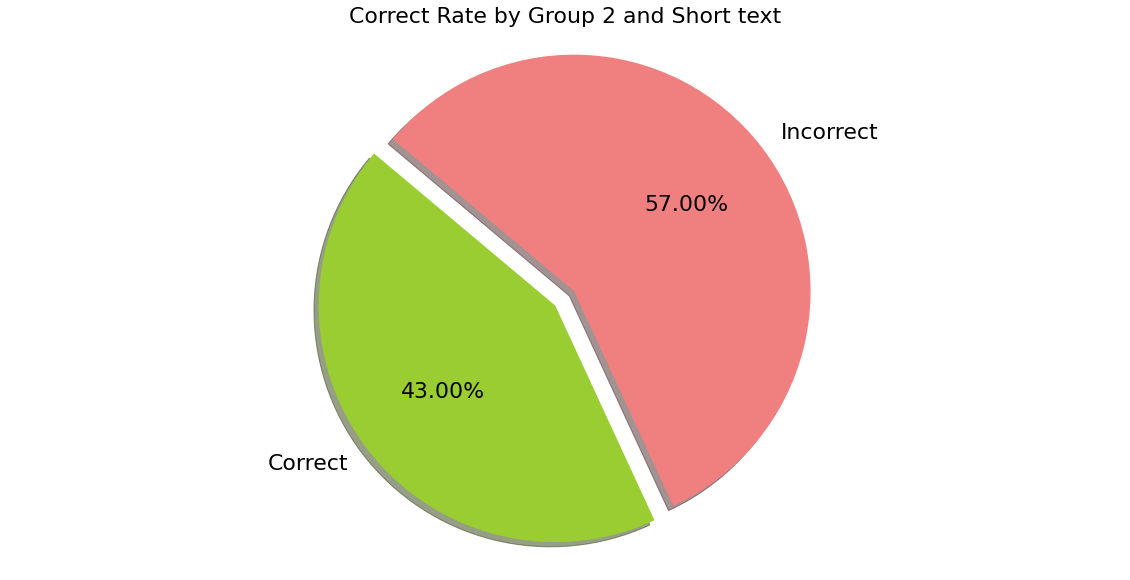

In [16]:
labels = ['Correct', 'Incorrect']

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
plt.rcParams["font.size"]= 22
plt.rcParams["legend.loc"] = 'upper right' 
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=22) 
sizes = [np.around(a_CR_l1.mean(),2), 1-np.around(a_CR_l1.mean(),2)]
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')
ax.set_title('Correct Rate by Group 1 and Long text')
plt.show()

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
plt.rcParams["font.size"]= 22
plt.rcParams["legend.loc"] = 'upper right' 
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=22) 
sizes = [np.around(a_CR_s1.mean(),2), 1-np.around(a_CR_s1.mean(),2)]
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')
ax.set_title('Correct Rate by Group 1 and Short text')
plt.show()

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
plt.rcParams["font.size"]= 22
plt.rcParams["legend.loc"] = 'upper right' 
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=22) 
sizes = [np.around(a_CR_l2.mean(),2), 1-np.around(a_CR_l2.mean(),2)]
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')
ax.set_title('Correct Rate by Group 2 and Long text')
plt.show()

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
plt.rcParams["font.size"]= 22
plt.rcParams["legend.loc"] = 'upper right' 
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=22) 
sizes = [np.around(a_CR_s2.mean(),2), 1-np.around(a_CR_s2.mean(),2)]
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')
ax.set_title('Correct Rate by Group 2 and Short text')
plt.show()